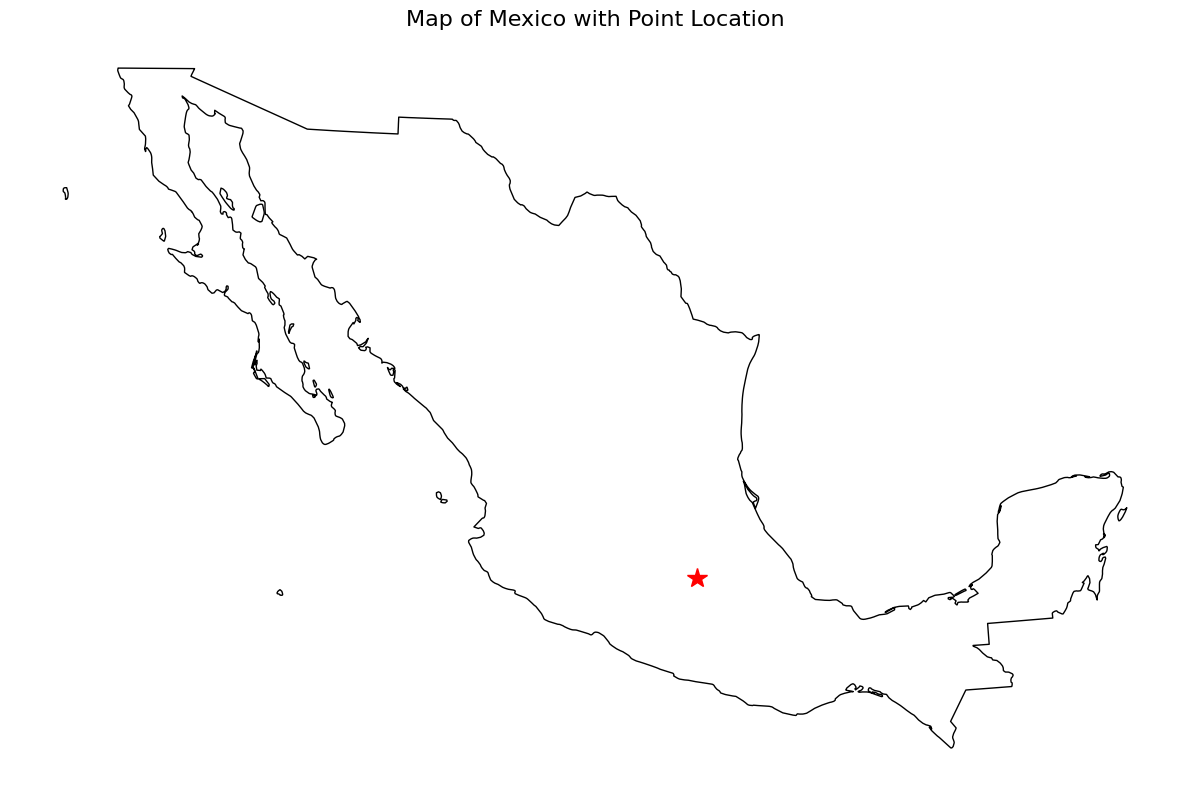

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the shapefile
world = gpd.read_file('World_Countries_(Generalized)/World_Countries_Generalized.shp')

# Ensure the shapefile is in WGS 84
if world.crs != 'EPSG:6372':
    world = world.to_crs(epsg=6372)


mexico = world[world['COUNTRY'] == 'Mexico']

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Mexico
mexico.plot(ax=ax, color='white', edgecolor='black')

# Add a specific point (example: Mexico City coordinates)
longitude = 2800163.325798929
latitude = 829057.5193839237
ax.plot(longitude, latitude, marker='*', color='red', markersize=15, label='Mexico City')

# Add a text label
# ax.annotate('Mexico City', 
#            xy=(longitude, latitude), 
#            xytext=(10, 10),
#            textcoords='offset points',
#            fontsize=12)

# Customize the plot
plt.title('Map of Mexico with Point Location', fontsize=16)
ax.axis('off')

plt.tight_layout()
plt.show()

100%|██████████| 318/318 [00:02<00:00, 153.93it/s]


starting clipping
done clipping
plotting mexico
plotting grid


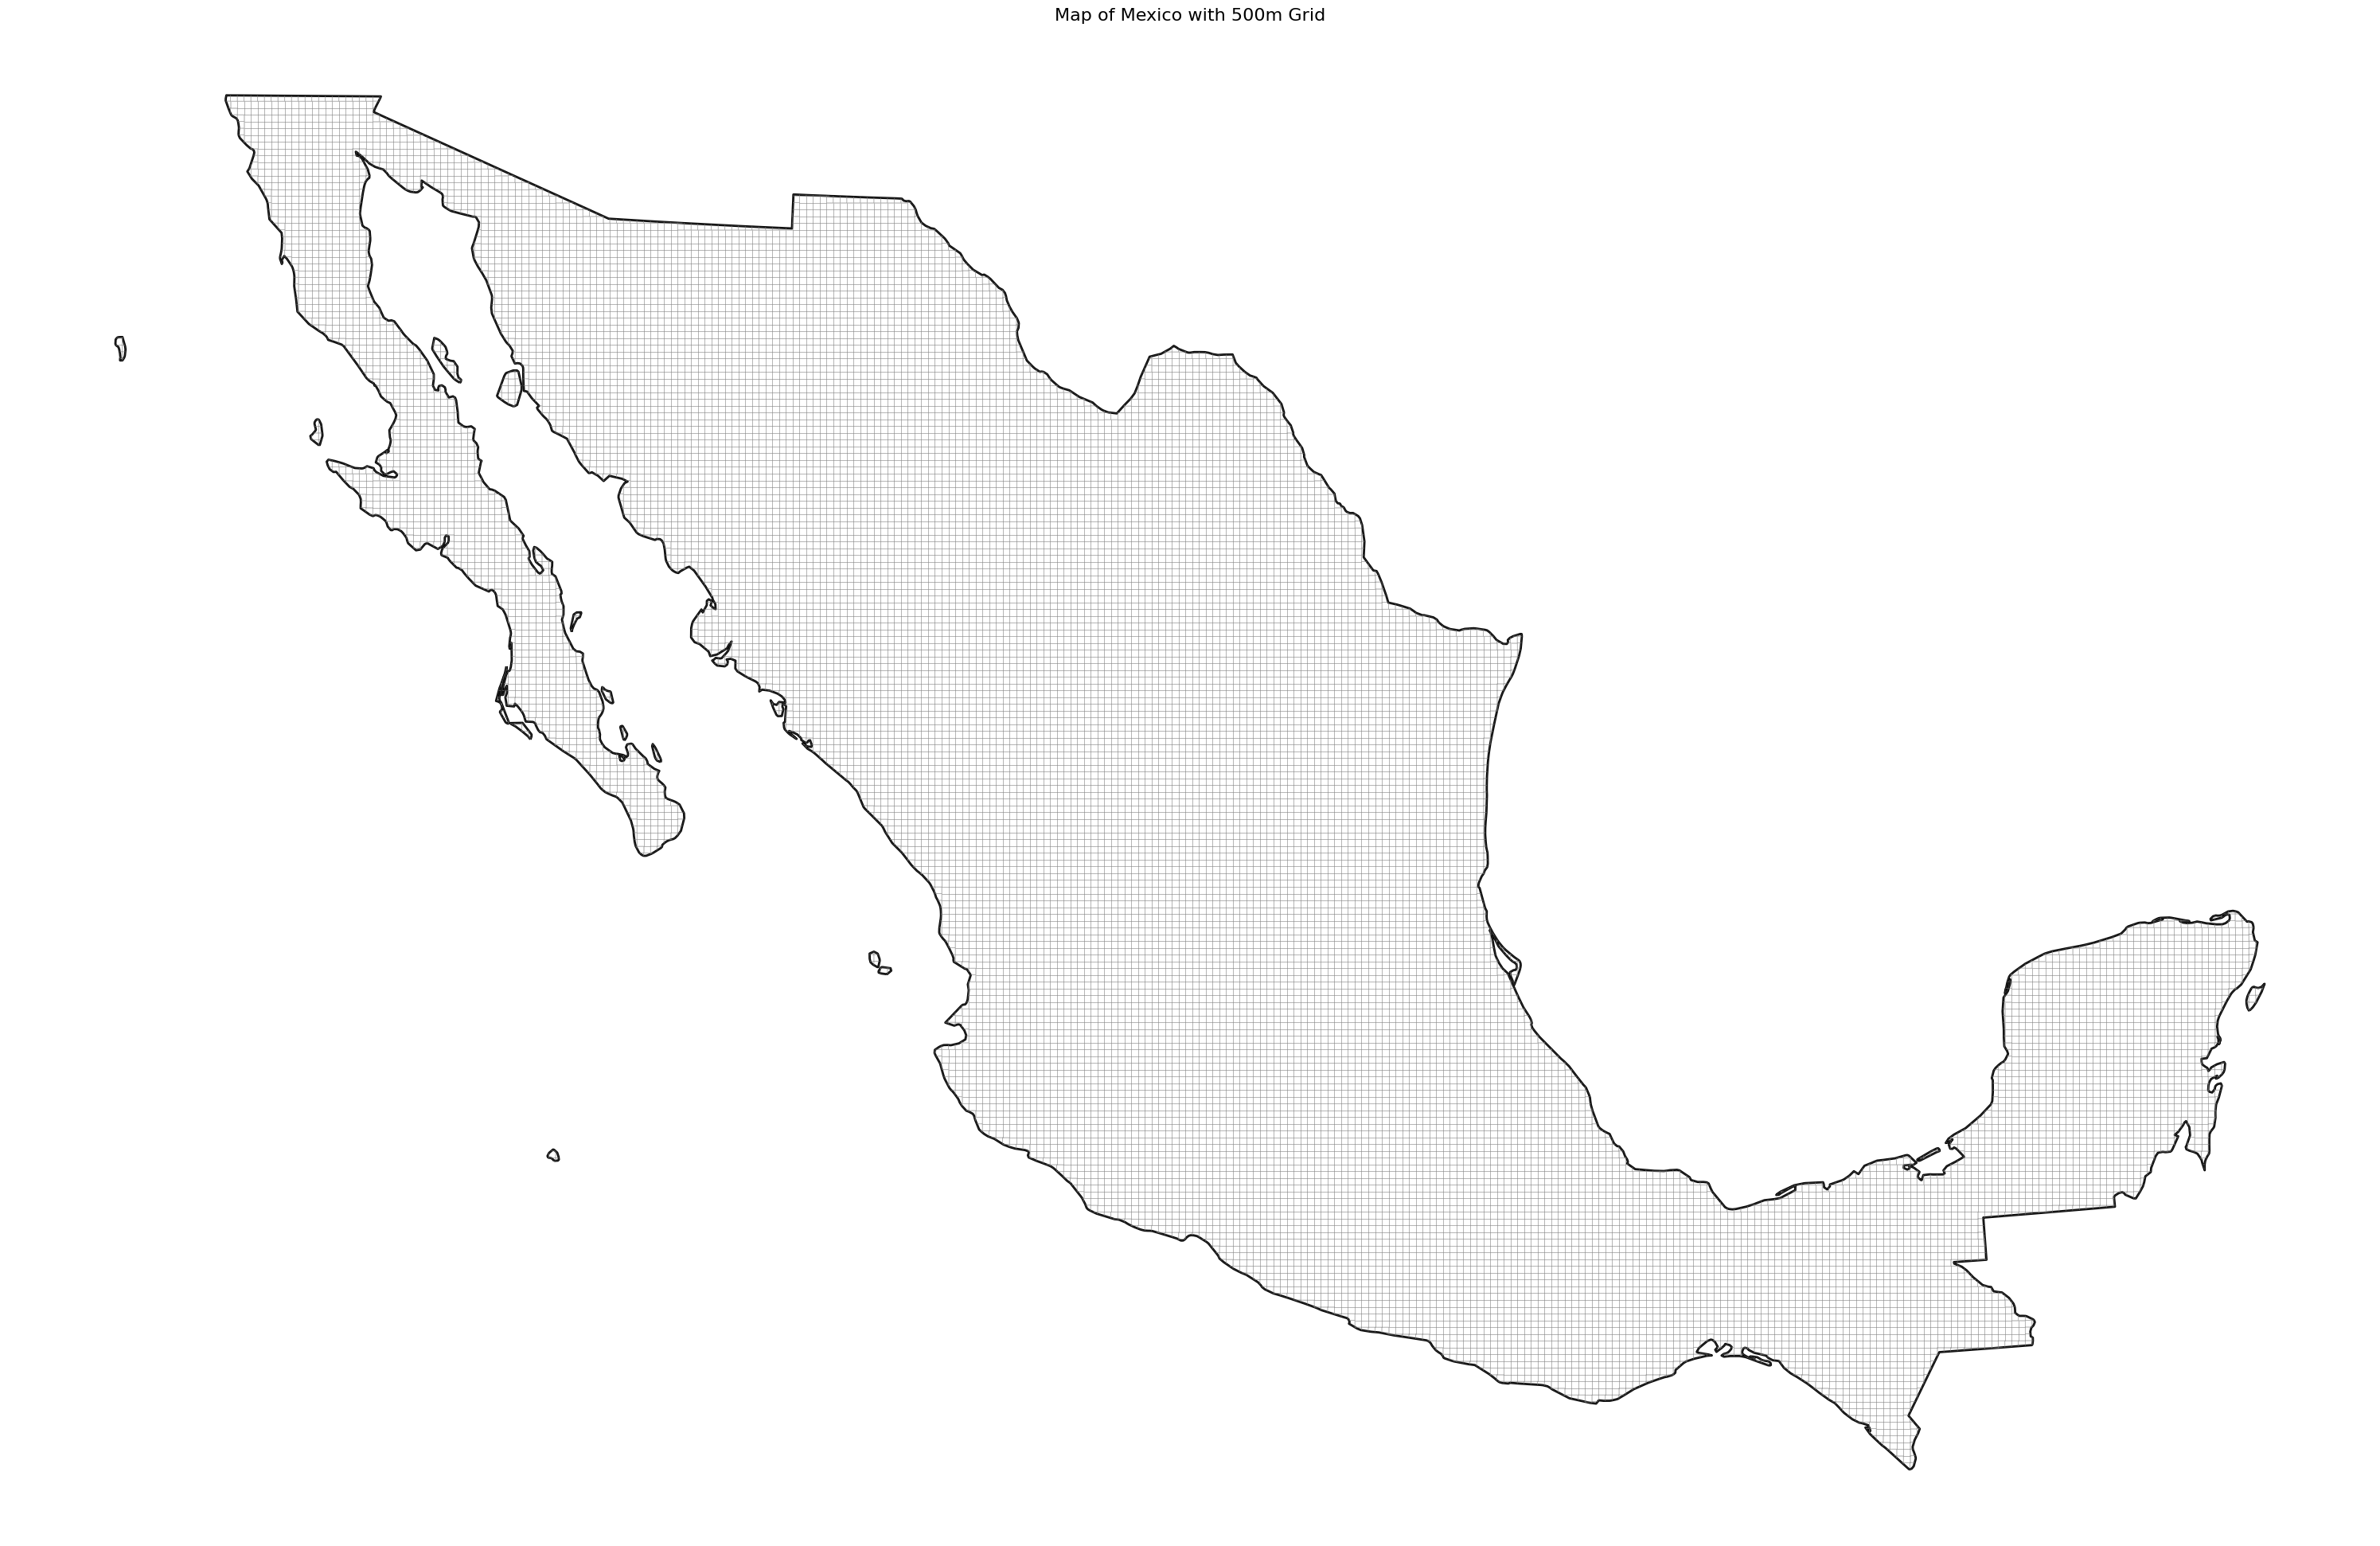

In [8]:
import numpy as np
from tqdm import tqdm
from shapely.geometry import box

mexico_crs = mexico.to_crs(epsg=6372)

# Get the bounds of Mexico in UTM coordinates
minx, miny, maxx, maxy = mexico_crs.total_bounds

# Create grid cells of 500m
cell_size = 10000  # meters
x_coords = np.arange(minx, maxx, cell_size)
y_coords = np.arange(miny, maxy, cell_size)

# Create grid cells
grid_cells = []
for x in tqdm(x_coords):
    for y in y_coords:
        cell = box(x, y, x + cell_size, y + cell_size)
        grid_cells.append(cell)

# Create GeoDataFrame from grid
grid = gpd.GeoDataFrame(geometry=grid_cells, crs=mexico_crs.crs)

print("starting clipping")
# Clip grid to Mexico's boundary
grid_clipped = gpd.clip(grid, mexico_crs)
print("done clipping")

# Create the plot
fig, ax = plt.subplots(figsize=(30, 20))

# Plot Mexico
print("plotting mexico")
mexico_crs.plot(ax=ax, color='white', edgecolor='black', linewidth=2)

# Plot grid
print("plotting grid")
grid_clipped.plot(ax=ax, facecolor='none', edgecolor='grey', alpha=0.5, linewidth=0.5)

# Customize the plot
plt.title('Map of Mexico with 500m Grid', fontsize=16)
ax.axis('off')

plt.tight_layout()
plt.show()

In [9]:
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, box
import matplotlib.pyplot as plt

def get_grid_cell(lat, lon, cell_size=500):
    """
    Get the grid cell ID for a given coordinate.
    
    Parameters:
    lat (float): Latitude in WGS84
    lon (float): Longitude in WGS84
    cell_size (float): Size of grid cells in meters (default 500)
    
    Returns:
    tuple: (row_id, col_id) identifying the grid cell
    """
    # Convert WGS84 coordinate to UTM
    point = gpd.GeoDataFrame(
        geometry=[Point(lon, lat)],
        crs="EPSG:4326"  # WGS84
    ).to_crs("EPSG:6372")  # Mexico UTM
    
    # Get UTM coordinates
    x = point.geometry.x[0]
    y = point.geometry.y[0]
    
    # Calculate grid cell indices
    row_id = int(np.floor(y / cell_size))
    col_id = int(np.floor(x / cell_size))
    
    return (row_id, col_id)

def color_grid_cell(grid_cell_id, color, grid_gdf, ax=None, alpha=0.5):
    """
    Color a specific grid cell on the map.
    
    Parameters:
    grid_cell_id (tuple): (row_id, col_id) of the cell to color
    color (str): Color to fill the cell with
    grid_gdf (GeoDataFrame): The clipped grid of Mexico
    ax (matplotlib.axes): Matplotlib axes to plot on
    alpha (float): Transparency of the coloring (0-1)
    
    Returns:
    matplotlib.axes: The modified axes object
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 10))
    
    row_id, col_id = grid_cell_id
    cell_size = 500  # meters
    
    # Create the box for the specified cell
    cell_bounds = get_cell_bounds(grid_cell_id)
    cell = box(*cell_bounds)
    
    # Create a GeoDataFrame for the cell
    cell_gdf = gpd.GeoDataFrame(geometry=[cell], crs=grid_gdf.crs)
    
    # Plot the cell
    cell_gdf.plot(ax=ax, color=color, alpha=alpha)
    
    return ax

def get_cell_bounds(grid_cell_id, cell_size=500):
    """
    Get the bounding box coordinates for a grid cell.
    
    Parameters:
    grid_cell_id (tuple): (row_id, col_id) of the cell
    cell_size (float): Size of grid cells in meters (default 500)
    
    Returns:
    tuple: (minx, miny, maxx, maxy) in UTM coordinates
    """
    row_id, col_id = grid_cell_id
    
    minx = col_id * cell_size
    miny = row_id * cell_size
    maxx = minx + cell_size
    maxy = miny + cell_size
    
    return (minx, miny, maxx, maxy)

In [11]:
# Get grid cell for a coordinate
lat, lon = 19.4326, -99.1332  # Mexico City coordinates
cell_id = get_grid_cell(lat, lon)
cell_id

(1658, 5600)

In [12]:
# Get the bounds of the cell
bounds = get_cell_bounds(cell_id)
print(f"Cell bounds (UTM): {bounds}")

Cell bounds (UTM): (2800000, 829000, 2800500, 829500)


In [ ]:


# Plot Mexico with the grid
fig, ax = plt.subplots(figsize=(15, 10))
mexico_crs.plot(ax=ax, color='white', edgecolor='black')
grid_clipped.plot(ax=ax, facecolor='none', edgecolor='grey', alpha=0.5)

# Color a specific cell red
ax = color_grid_cell(cell_id, 'red', grid_clipped, ax)

# Get the bounds of the cell
bounds = get_cell_bounds(cell_id)
print(f"Cell bounds (UTM): {bounds}")

plt.show()


In [13]:
lat, lon = 19.4326, -99.1332  # Mexico City coordinates
cell_id = get_grid_cell(lat, lon, 1000)
cell_id

(829, 2800)

100%|██████████| 318/318 [00:01<00:00, 160.32it/s]


Starting clipping
Done clipping
Plotting Mexico
Plotting grid


AttributeError: 'Polygon' object has no attribute 'plot'

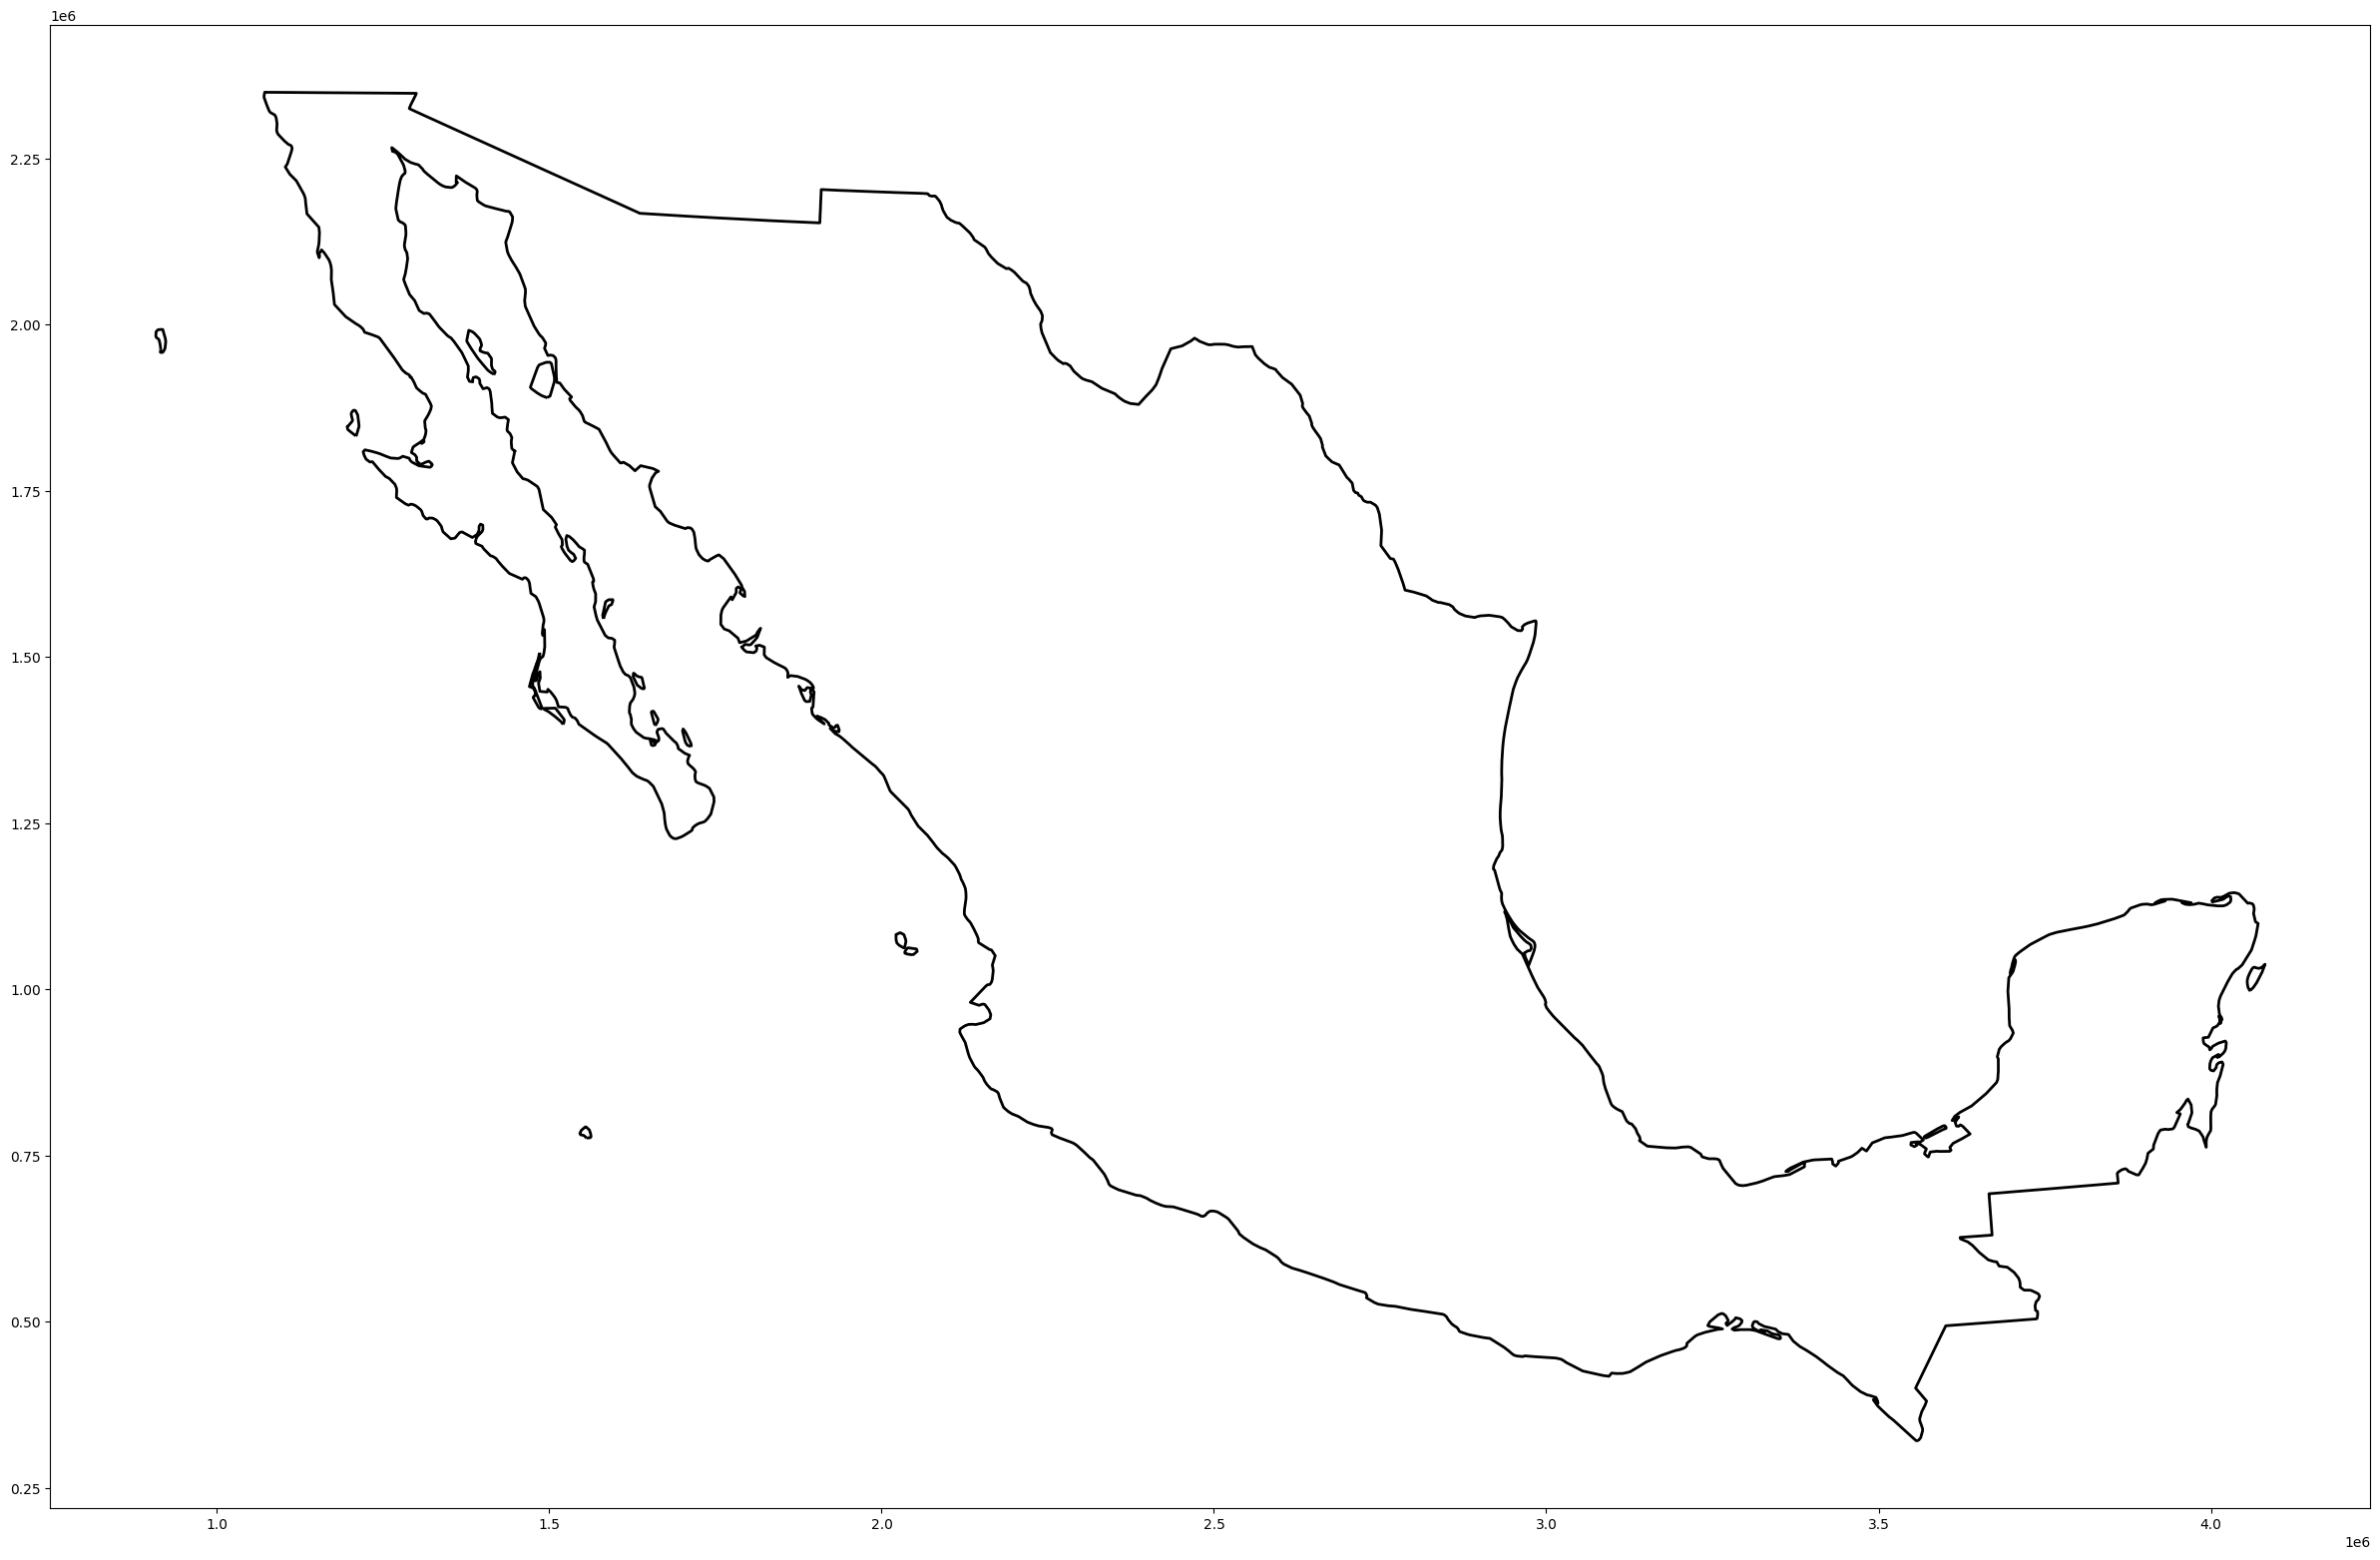

In [14]:
import numpy as np
from tqdm import tqdm
from shapely.geometry import box
import geopandas as gpd
import matplotlib.pyplot as plt

# Convert Mexico to UTM coordinates
mexico_crs = mexico.to_crs(epsg=6372)

# Get the bounds of Mexico in UTM coordinates
minx, miny, maxx, maxy = mexico_crs.total_bounds

# Create grid cells of 10km
cell_size = 10000  # meters
x_coords = np.arange(minx, maxx, cell_size)
y_coords = np.arange(miny, maxy, cell_size)

# Specify the coordinates of the cell you want to highlight
target_x = 829  # Replace with your desired x coordinate
target_y = 2800  # Replace with your desired y coordinate

# Create grid cells with color information
grid_cells = []
cell_colors = []
for x in tqdm(x_coords):
    for y in y_coords:
        cell = box(x, y, x + cell_size, y + cell_size)
        grid_cells.append(cell)
        
        # Check if this is the target cell
        if (target_x is not None and target_y is not None and 
            x <= target_x < x + cell_size and 
            y <= target_y < y + cell_size):
            cell_colors.append('red')  # You can change this color
        else:
            cell_colors.append('none')

# Create GeoDataFrame from grid with color information
grid = gpd.GeoDataFrame({
    'geometry': grid_cells,
    'color': cell_colors
}, crs=mexico_crs.crs)

print("Starting clipping")
# Clip grid to Mexico's boundary
grid_clipped = gpd.clip(grid, mexico_crs)
print("Done clipping")

# Create the plot
fig, ax = plt.subplots(figsize=(30, 20))

# Plot Mexico
print("Plotting Mexico")
mexico_crs.plot(ax=ax, color='white', edgecolor='black', linewidth=2)

# Plot grid with colors
print("Plotting grid")
for idx, row in grid_clipped.iterrows():
    color = row['color']
    if color == 'none':
        row.geometry.plot(ax=ax, facecolor='none', edgecolor='grey', alpha=0.5, linewidth=0.5)
    else:
        row.geometry.plot(ax=ax, facecolor=color, edgecolor='grey', alpha=0.5, linewidth=0.5)

# Customize the plot
plt.title('Map of Mexico with 10km Grid', fontsize=16)
ax.axis('off')

plt.tight_layout()
plt.show()

100%|██████████| 318/318 [00:02<00:00, 143.94it/s]


Starting clipping
Done clipping
Plotting Mexico
Plotting grid


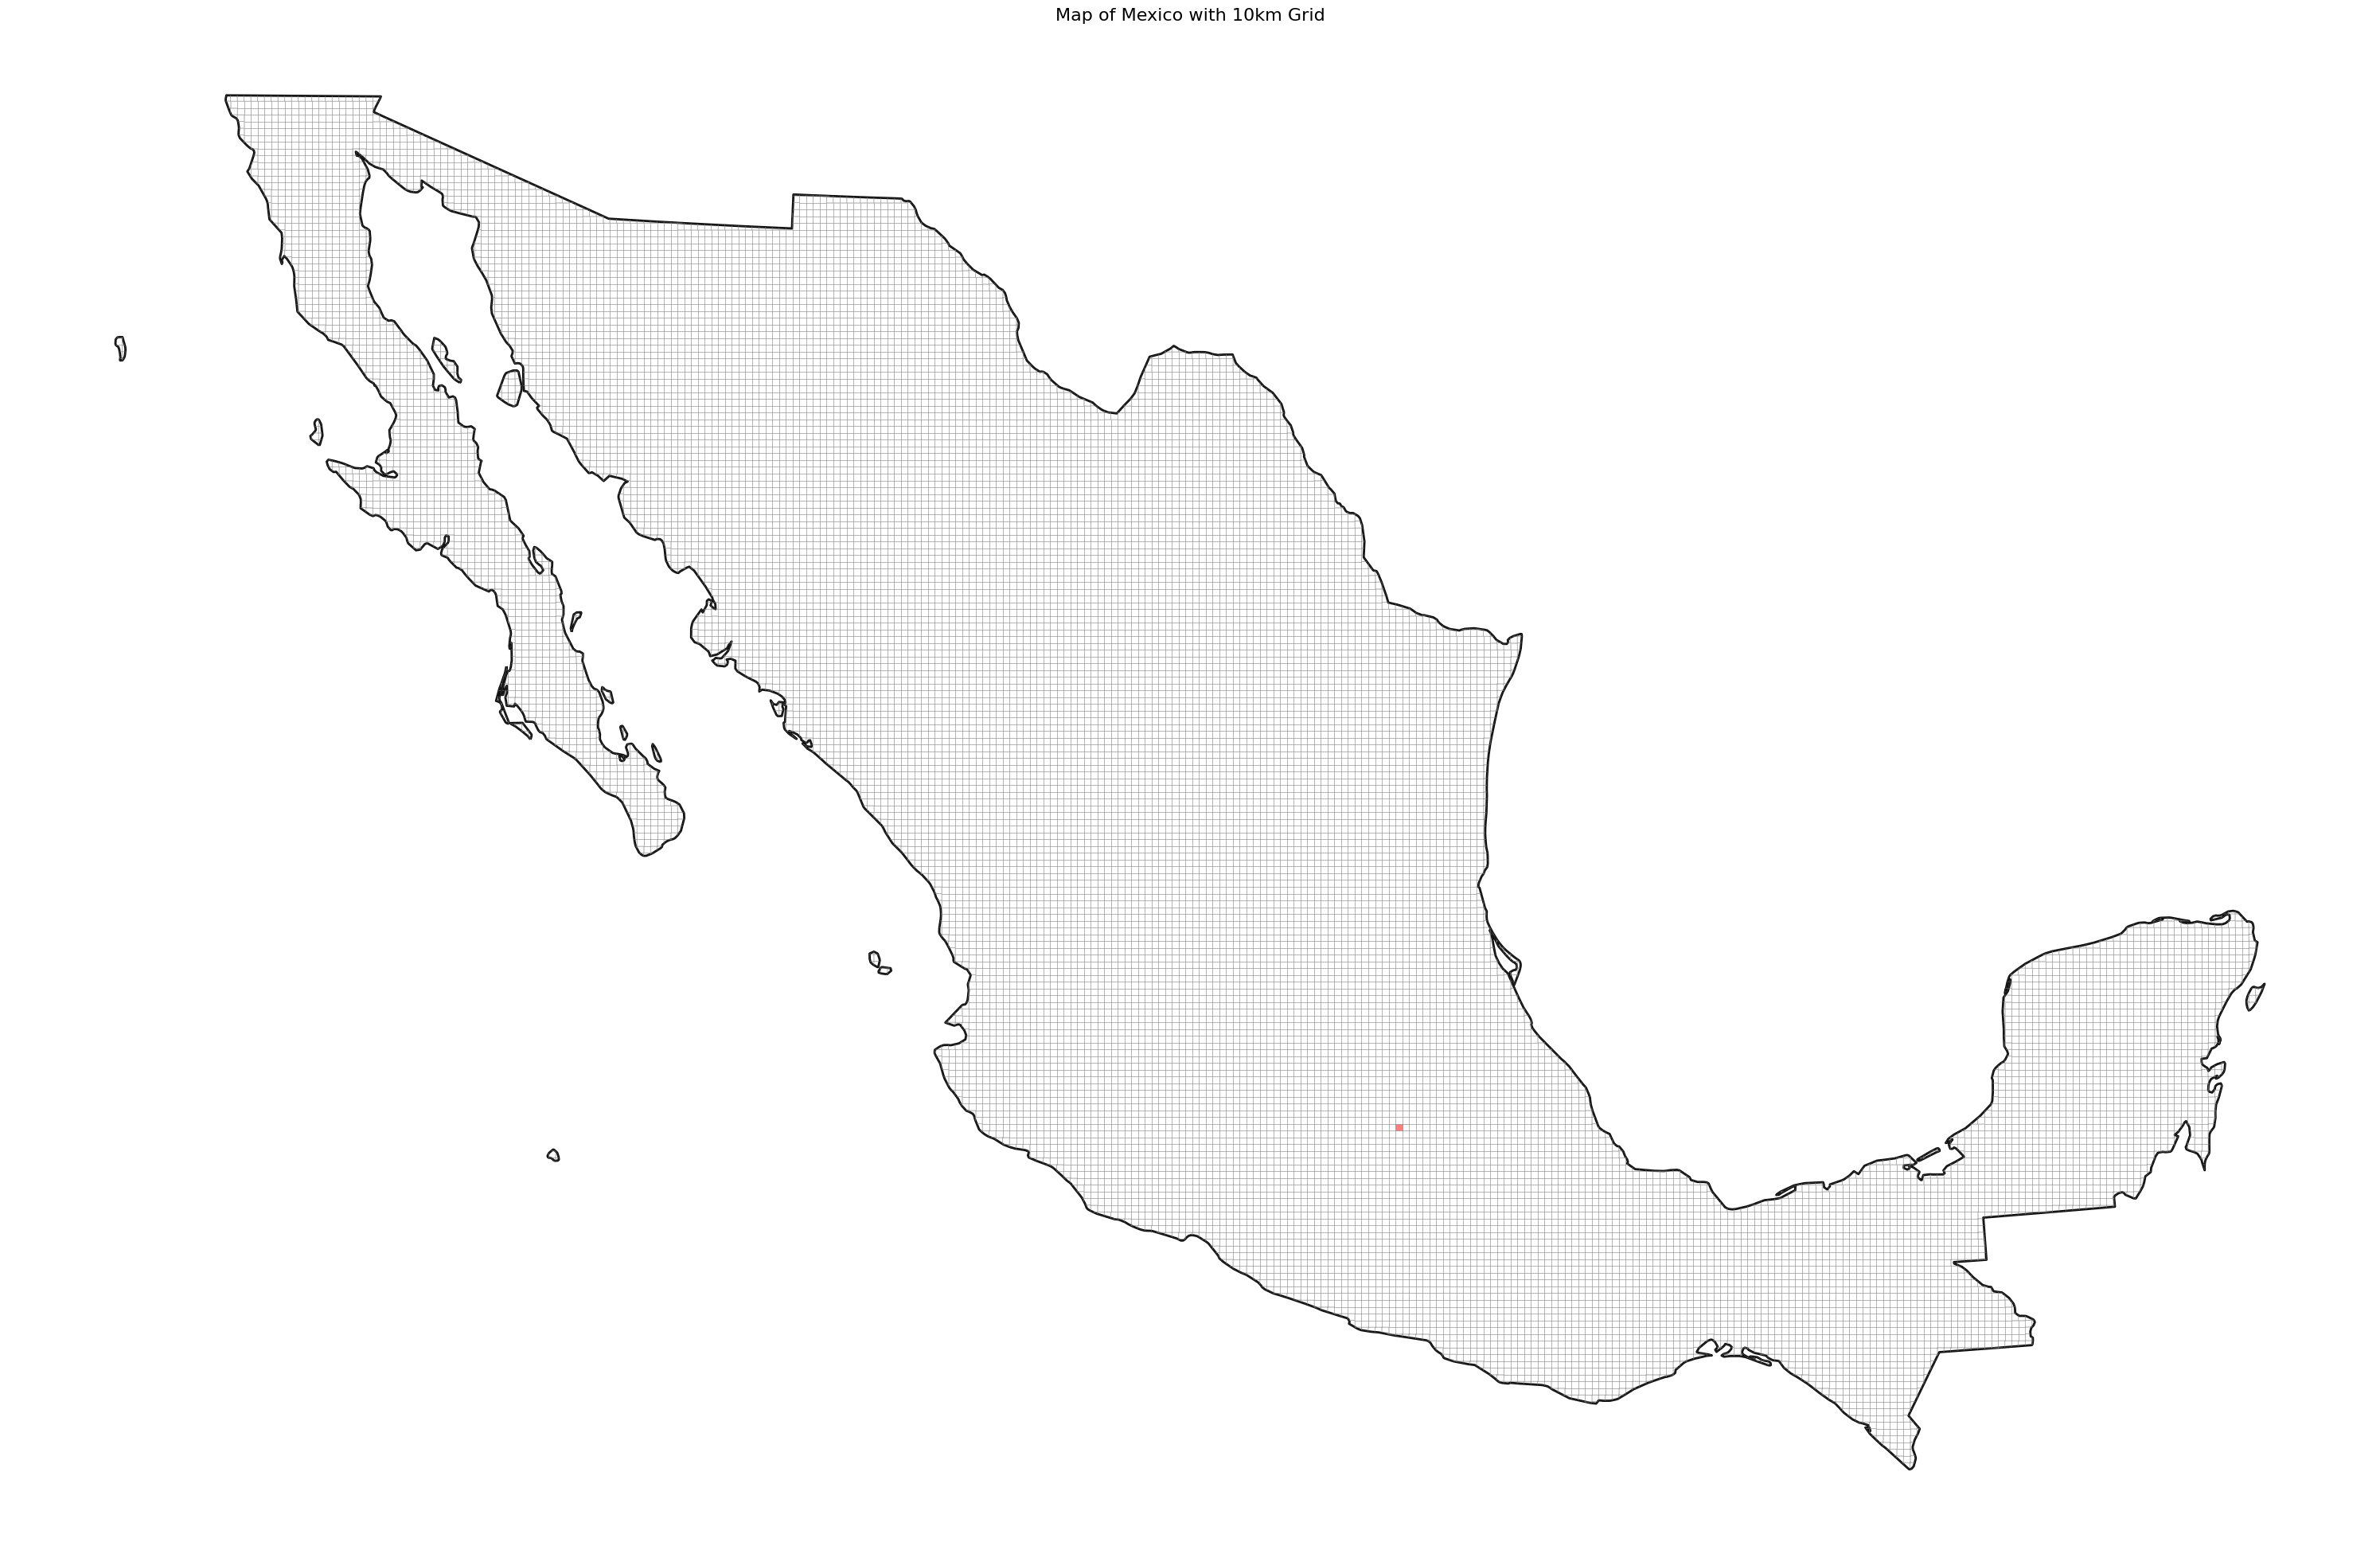

In [17]:
import numpy as np
from tqdm import tqdm
from shapely.geometry import box
import geopandas as gpd
import matplotlib.pyplot as plt

# Convert Mexico to UTM coordinates
mexico_crs = mexico.to_crs(epsg=6372)

# Get the bounds of Mexico in UTM coordinates
minx, miny, maxx, maxy = mexico_crs.total_bounds

# Create grid cells of 10km
cell_size = 10000  # meters
x_coords = np.arange(minx, maxx, cell_size)
y_coords = np.arange(miny, maxy, cell_size)

# Specify the coordinates of the cell you want to highlight
target_x = 2800000,   # Replace with your desired x coordinate
target_y = 829000  # Replace with your desired y coordinate

# Create grid cells with color information
grid_cells = []
cell_colors = []
for x in tqdm(x_coords):
    for y in y_coords:
        cell = box(x, y, x + cell_size, y + cell_size)
        grid_cells.append(cell)
        
        # Check if this is the target cell
        if (target_x is not None and target_y is not None and 
            x <= target_x < x + cell_size and 
            y <= target_y < y + cell_size):
            cell_colors.append('red')  # You can change this color
        else:
            cell_colors.append('none')

# Create GeoDataFrame from grid with color information
grid = gpd.GeoDataFrame({
    'geometry': grid_cells,
    'color': cell_colors
}, crs=mexico_crs.crs)

print("Starting clipping")
# Clip grid to Mexico's boundary
grid_clipped = gpd.clip(grid, mexico_crs)
print("Done clipping")

# Create the plot
fig, ax = plt.subplots(figsize=(30, 20))

# Plot Mexico
print("Plotting Mexico")
mexico_crs.plot(ax=ax, color='white', edgecolor='black', linewidth=2)

# Plot grid with colors
print("Plotting grid")
# Plot cells with no color (transparent)
transparent_cells = grid_clipped[grid_clipped['color'] == 'none']
transparent_cells.plot(ax=ax, facecolor='none', edgecolor='grey', alpha=0.5, linewidth=0.5)

# Plot colored cells
colored_cells = grid_clipped[grid_clipped['color'] != 'none']
if not colored_cells.empty:
    colored_cells.plot(ax=ax, facecolor=colored_cells['color'], edgecolor='grey', alpha=0.5, linewidth=0.5)

# Customize the plot
plt.title('Map of Mexico with 10km Grid', fontsize=16)
ax.axis('off')

plt.tight_layout()
plt.show()

In [16]:
x_coords

array([ 908028.48216986,  918028.48216986,  928028.48216986,
        938028.48216986,  948028.48216986,  958028.48216986,
        968028.48216986,  978028.48216986,  988028.48216986,
        998028.48216986, 1008028.48216986, 1018028.48216986,
       1028028.48216986, 1038028.48216986, 1048028.48216986,
       1058028.48216986, 1068028.48216986, 1078028.48216986,
       1088028.48216986, 1098028.48216986, 1108028.48216986,
       1118028.48216986, 1128028.48216986, 1138028.48216986,
       1148028.48216986, 1158028.48216986, 1168028.48216986,
       1178028.48216986, 1188028.48216986, 1198028.48216986,
       1208028.48216986, 1218028.48216986, 1228028.48216986,
       1238028.48216986, 1248028.48216986, 1258028.48216986,
       1268028.48216986, 1278028.48216986, 1288028.48216986,
       1298028.48216986, 1308028.48216986, 1318028.48216986,
       1328028.48216986, 1338028.48216986, 1348028.48216986,
       1358028.48216986, 1368028.48216986, 1378028.48216986,
       1388028.48216986,